# Table of Contents

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing Data](#2.-Importing-Data)    
3. [Initial Exploration](#3.-Initial-Exploration)    
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis) <br>
    4.1 [Missing Values](#4.1-Missing-Values)<br>
    4.2 [Outliers](#4.2-Outliers)<br>
    4.3 [Feature Engineering](#4.3-Feature-Engineering)<br>
    4.4 [Visualisations](#4.4-Visualisations)<br>
5. [Preprocessing fro Sentiment Analysis](#5.-Preprocessing-for-Sentiment-Analysis) <br>   
6. [Exporting Preprocessed Data](#6.-Exporting-Preprocessed-data)

In this notebook Exploratory Data Analysis will be performed. This consists of Data Exploration, Missing Values, Outliers, Feature Engineering and VIsualisations. At the end, the data is preprocessed using functions in an external file, *preprocessing*, to make it suitable for Sentiment Analysis.

** **

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emoji

# External Functions File
import preprocessing

# Warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 2. Importing Data

In [2]:
#read in dataset in pandas format
#dataset = pd.read_csv('airlines_reviews.csv', sep=',')
dataset = pd.read_csv('/Users/antoniooliveira/Downloads/airlines_reviews.csv')

In [3]:
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


## 3. Initial Exploration

**Describe & Info**

In [4]:
dataset.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

**Unique Values**

In [6]:
dataset.nunique()

Title                     7614
Name                      6583
Review Date               2549
Airline                     10
Verified                     5
Reviews                   8099
Type of Traveller            4
Month Flown                107
Route                     5566
Class                        4
Seat Comfort                 5
Staff Service                5
Food & Beverages             5
Inflight Entertainment       6
Value For Money              5
Overall Rating              10
Recommended                  2
dtype: int64

In [7]:
list_ = ['Airline', 'Verified', 'Type of Traveller', 'Class', 'Seat Comfort',
        'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money',
        'Overall Rating', 'Recommended']


for value in list_:
    unique_values = dataset[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")

    
## Verified has some weird values --> Unverified and NotVerified arent the same ?

Unique values in column 'Airline': 
 ['Singapore Airlines' 'Qatar Airways' 'All Nippon Airways' 'Emirates'
 'Japan Airlines' 'Turkish Airlines' 'Air France' 'Cathay Pacific Airways'
 'EVA Air' 'Korean Air'] 


Unique values in column 'Verified': 
 ['True' 'False' '*Unverified*' 'NotVerified'
 'we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us'] 


Unique values in column 'Type of Traveller': 
 ['Solo Leisure' 'Family Leisure' 'Business' 'Couple Leisure'] 


Unique values in column 'Class': 
 ['Business Class' 'Economy Class' 'Premium Economy' 'First Class'] 


Unique values in column 'Seat Comfort': 
 [4 5 1 2 3] 


Unique values in column 'Staff Service': 
 [4 3 5 1 2] 


Unique values in column 'Food & Beverages': 
 [4 2 5 1 3] 


Unique values in column 'Inflight Entertainment': 
 [4 1 5 2 3 0] 


Un

## 4. Exploratory Data Analysis

### 4.1 Missing Values

In [8]:
dataset.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

### 4.2 Outliers

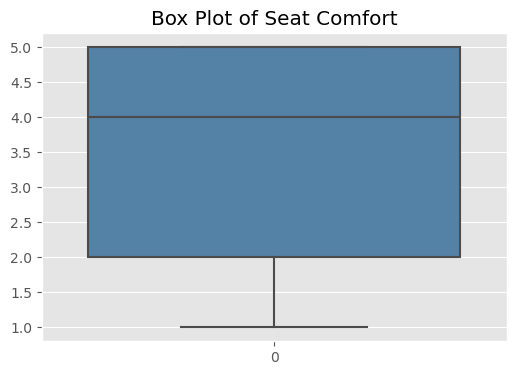

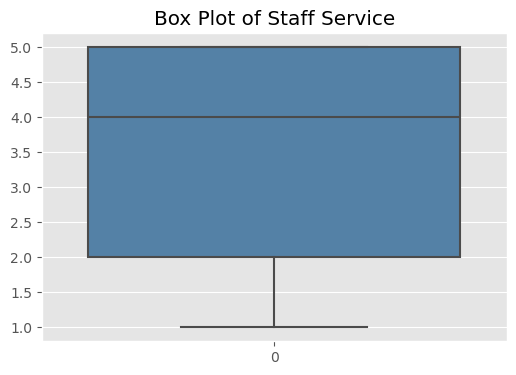

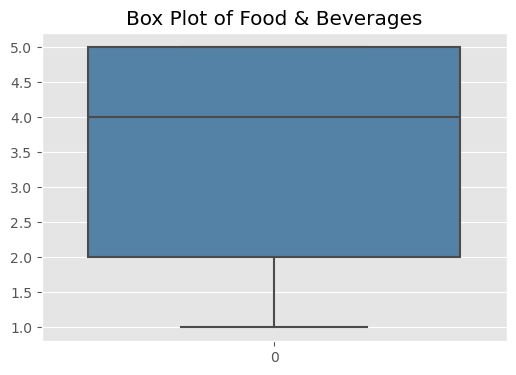

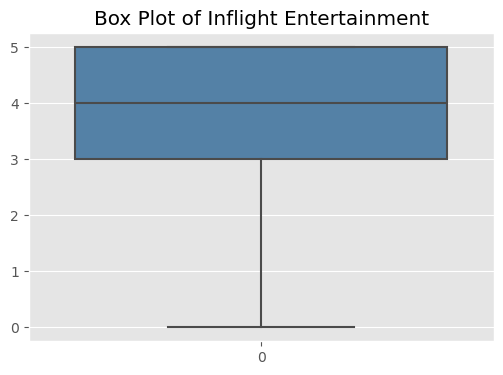

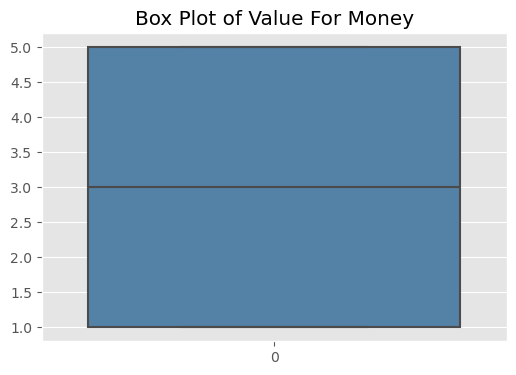

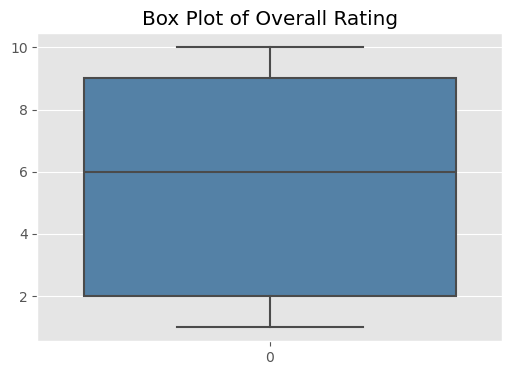

In [9]:
import seaborn as sns
# Get a list of all numeric column names
columns_to_check = dataset.select_dtypes(include=['int', 'float']).columns.to_list()

for column in columns_to_check:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=dataset[column], color = 'steelblue')
    plt.title(f'Box Plot of {column}')
    plt.xticks()
    plt.show()


### 4.3 Feature Engineering 

**Looking for Emojis**

In [10]:
reviews_column = dataset['Reviews']

# Function to check if a string contains emojis
def contain_emoji(review):
    emoList = emoji.emoji_list(review)
    
    if emoList:
        return True
    
    return False

# Check for emojis in each review
emoji_check = [contain_emoji(review) for review in reviews_column]

# Print reviews containing emojis
for i in range(len(emoji_check)):
    if emoji_check[i] == True:
        print("This is Review: " + str(i))
        print(reviews_column[i])



This is Review: 4708
  Valerie, terminal 2A, Paris CDG airport, left our hearts feeling warm with her compassion, patience and understanding whilst checking our bags. She showed us great kindness and deserves recognition for her customer service skills performed. Thank you to Valerie, if you read this, for all the small efforts which made our travels much easier while pregnant. Thank you for going above and beyond ☺️ Turkish airlines hires great assets to their company.


Since there is only one Review it will be dropped

In [11]:
dataset.drop(4708, inplace=True)

**Converting Overall Rating to 3 classes**

Since the column overall rating has 10 classes, and our aim is to predict if the reviews are negative, positive or neutral, we use the following table to better split the existing classes into three groups.

In [12]:
dataset.groupby(['Overall Rating', 'Recommended']).size().unstack(fill_value=0).T

Overall Rating,1,2,3,4,5,6,7,8,9,10
Recommended,,,,,,,,,,
no,1791,669,488,330,305,123,54,14,19,20
yes,17,23,34,51,131,223,455,728,1035,1589


As one can see, there is a considerable amount of recommended values when the Overall Rating is equal or higher than 8. the opposite happens when looking at Overall Ratings smaller or equal to 3. Consequently, we decided to split Overall Rating as follows:
- 1-3 represented by 0, which means a negative sentiment
- 4-7 represented by 1, which means a neutral sentiment
- 8-10 represented by 2, which means a positive sentiment

In [13]:
#Create new column, convert scoring into 3 categories
dataset["Sentiment"] = dataset["Overall Rating"].apply(preprocessing.score_convert_senti)

#dataset has derived sentiment column added
dataset.head(2)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,0


**Converting Reviews into a list**

In [14]:
#place reviews column textual data into list
reviews = dataset["Reviews"]
reviews_list = list(reviews)

**Converting Review Date to datetime format and retrieving the year as a new variable**

In [15]:
dataset['Review Date'] = pd.to_datetime(dataset['Review Date'])
dataset['Year'] = dataset['Review Date'].dt.year

### 4.4 Visualisations

**Frequency Distribution of Overall Ratings**

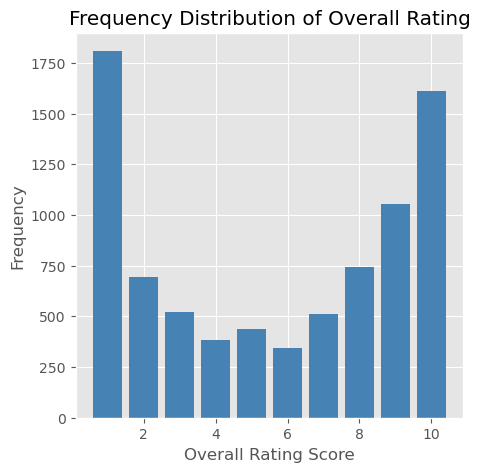

In [16]:
#Determine frequency of Overall Ratings Through Plot
freq_counts = dataset["Overall Rating"].value_counts()
rating_score = freq_counts.index

plt.figure(figsize=(5, 5))
plt.bar(rating_score, freq_counts, color='steelblue')
plt.xlabel('Overall Rating Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Overall Rating')
plt.show()

**Average Rating by Airline**

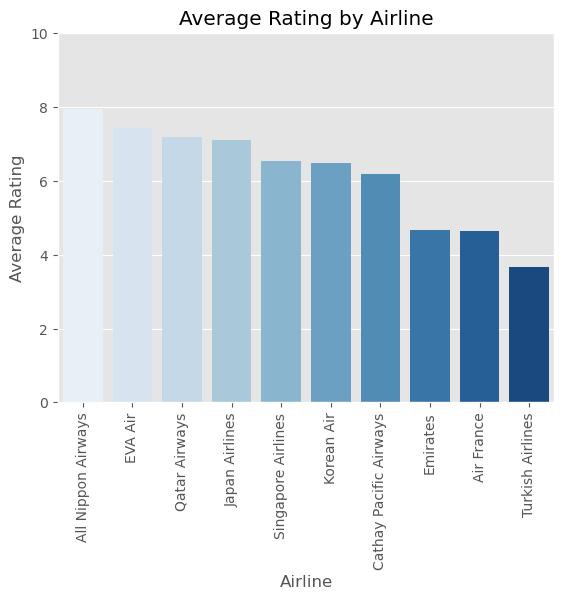

In [17]:
dataset_temp = dataset[['Overall Rating','Airline']].groupby(['Airline']).mean().sort_values(by = 'Overall Rating', ascending= False).reset_index()
sns.barplot(data= dataset_temp, x='Airline', y='Overall Rating', palette = 'Blues')

plt.ylim(0, 10) 
plt.xticks(rotation=90) 
plt.xlabel('Airline')
plt.ylabel('Average Rating')
plt.title('Average Rating by Airline')
plt.show()

**Variation of Overall Rating, Seat Comfort,  Staff Service, Food & Beverages, Inflight Entertainment and Value For Money across the years**

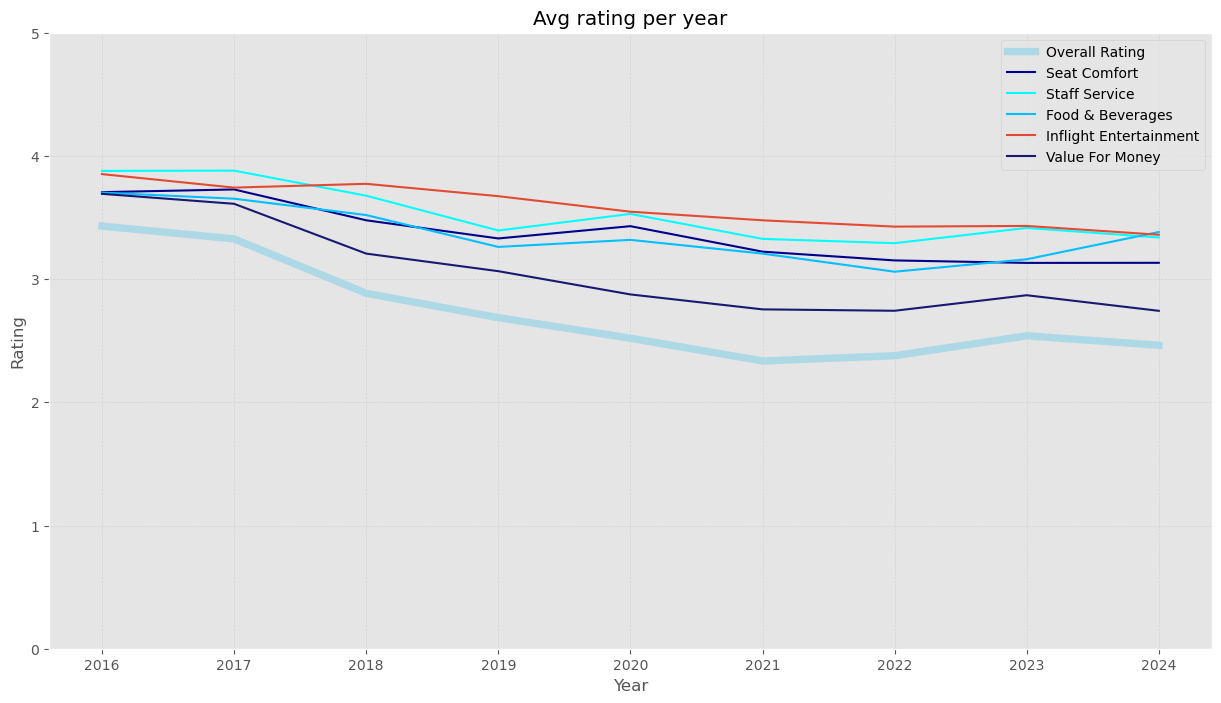

In [18]:
avg_overall_rating_per_year = dataset.groupby(['Year'])['Overall Rating'].mean()/2
avg_seat_comfort_rating_per_year = dataset.groupby(['Year'])['Seat Comfort'].mean()
avg_staff_service_rating_per_year = dataset.groupby(['Year'])['Staff Service'].mean()
avg_Food_n_Beverages_ratings_per_year =dataset.groupby(['Year'])['Food & Beverages'].mean()
avg_Inflight_Entertainment_ratings_per_year = dataset.groupby(['Year'])['Inflight Entertainment'].mean()
avg_Value_For_Money_ratings_per_year = dataset.groupby(['Year'])['Value For Money'].mean()


fig, ax = plt.subplots(figsize=(15,8))
avg_overall_rating_per_year.plot(kind = 'line',ax = ax, color = 'lightblue', linewidth = 5.3)
avg_seat_comfort_rating_per_year.plot(kind = 'line',ax = ax, color = 'darkblue')
avg_staff_service_rating_per_year.plot(kind = 'line',ax = ax, color = 'aqua')
avg_Food_n_Beverages_ratings_per_year.plot(kind = 'line',ax = ax, color = 'deepskyblue')
avg_Inflight_Entertainment_ratings_per_year.plot(kind = 'line',ax = ax)
avg_Value_For_Money_ratings_per_year.plot(kind = 'line',ax = ax, color = 'midnightblue')

ax.set_title('Avg rating per year')
ax.set_xlabel('Year')
ax.set_ylabel('Rating')
ax.set_ylim(0,5)
ax.grid(True, which = 'both')
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()

**Length vs Sentiment**

Here we wanted to explore if there was any relation between the length of the reviews and the Overall Sentiment associated with it

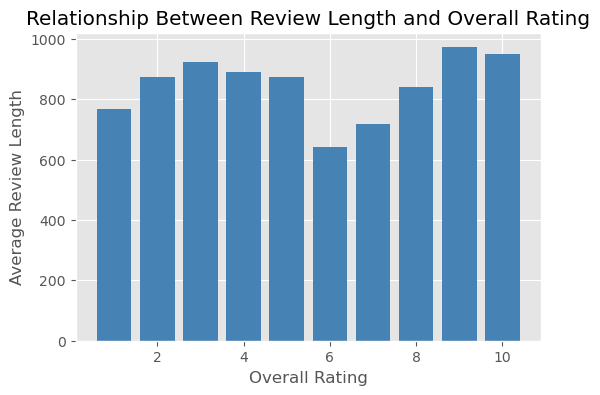

In [19]:
#Relationship Between Review Length and Rating
dataset['review_length'] = dataset['Reviews'].str.len()

avg_review_length = dataset.groupby('Overall Rating')['review_length'].mean()
ratings = dataset['Overall Rating'].unique()

fig, ax = plt.subplots(figsize = (6,4))
ax.bar(ratings, avg_review_length, color='steelblue')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Average Review Length')
ax.set_title('Relationship Between Review Length and Overall Rating')
plt.show()

As one can see, no relation was found

**Average Sentiment per Class**

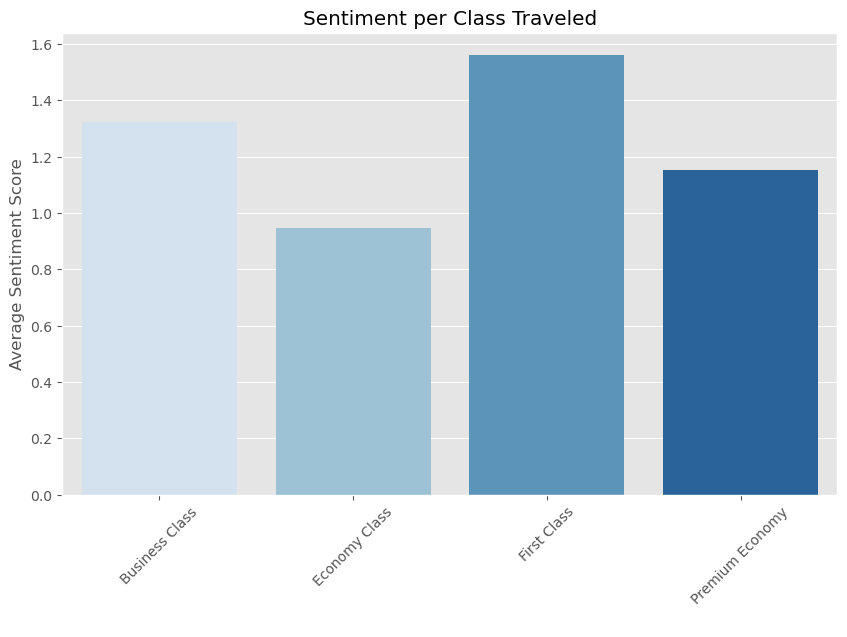

In [20]:
average_sentiment = dataset.groupby('Class')['Sentiment'].mean().reset_index()

# Plot sentiment per class 
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Sentiment', data=average_sentiment, ci=None, palette = 'Blues')
plt.title('Sentiment per Class Traveled')
plt.xlabel(' ')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)  
plt.show()

**Average Sentiment per Type of Traveler**

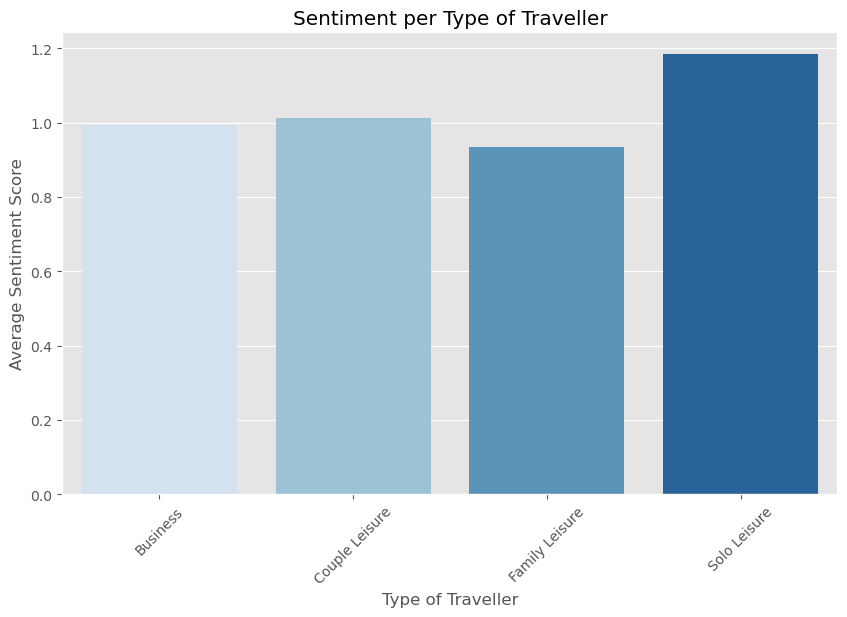

In [21]:
average_sentiment = dataset.groupby('Type of Traveller')['Sentiment'].mean().reset_index()

# Plot sentiment per Type of Traveller
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Traveller', y='Sentiment', data=average_sentiment, ci=None, palette = 'Blues')
plt.title('Sentiment per Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)  
plt.show()

**Dropping the Column Overall Rating, since it was replaced by Sentiment**

In [22]:
dataset = dataset.drop('Overall Rating', axis = 1)

## 5. Preprocessing for Sentiment Analysis

**Preprocessing with the function for Lexicon-based**

In [23]:
dataset['Reviews_1'] = dataset['Reviews'].apply(
    lambda x: preprocessing.reviews_preprocessor(x,
                                                     remove_punctuation=False,
                                                     lowercase=False,
                                                     remove_stopwords=True,
                                                     lemmatization=False,
                                                     stemming=False,
                                                     tokenized_output=False,
                                                     sentence_output=False))

**Preprocessing for LR and RF**

In [24]:
dataset['Reviews_4'] = preprocessing.preprocess_reviews(dataset['Reviews'])

**Partial Preprocessing with the function for BERT usage**

In [25]:
dataset['Reviews_2'] = dataset['Reviews'].apply(
    lambda x: preprocessing.reviews_preprocessor(x,
                                                     remove_punctuation=True,
                                                     lowercase=True,
                                                     remove_stopwords=True,
                                                     lemmatization=False,
                                                     stemming=False,
                                                     tokenized_output=False,
                                                     sentence_output=False))

**Preprocessing with the function for LSTM usage**

In [26]:
# dataset['Reviews_3'] = dataset['Reviews'].apply(
#      lambda x: preprocessing.lstm_preprocessing(dataset=dataset))

## 6. Exporting Preprocessed data

In [27]:
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Sentiment,Year,review_length,Reviews_1,Reviews_4,Reviews_2
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,...,4,4,4,yes,2,2024,467,Flight amazing. The crew onboard flight welcom...,flight amaz crew onboard flight welcom gave go...,flight amazing crew onboard flight welcoming g...
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,...,4,4,1,no,0,2024,249,Booking emergency exit seat still meant huge d...,book emerg exit seat still meant huge discomfo...,booking emergency exit seat still meant huge d...
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,...,2,1,5,yes,2,2024,196,Excellent performance fronts. I would definite...,excel perform front would definit choos use ai...,excellent performance fronts would definitely ...
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,...,5,5,5,yes,2,2024,991,Pretty comfortable flight considering I flying...,pretti comfort flight consid fli economi class...,pretty comfortable flight considering flying e...
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,...,5,5,5,yes,2,2024,310,The service consistently good start finish. Th...,servic consist good start finish cabin crew sh...,service consistently good start finish cabin c...


In [28]:
dataset.to_csv('processed_data.csv', index=False)